## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 33s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 4.8983 - accuracy: 0.2656 - val_loss: 13.3504 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 10s 5s/step - loss: 12.8455 - accuracy: 0.3906 - val_loss: 2.4393 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 10s 5s/step - loss: 3.6495 - accuracy: 0.3438 - val_loss: 8.6339 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 11s 6s/step - loss: 8.4345 - accuracy: 0.3125 - val_loss: 7.1514 - val_accuracy: 0.5345
Epoch 5/50
2/2 [==============================] - 11s 6s/step - loss: 7.3750 - accuracy: 0.3750 - val_loss: 4.4211 - val_accuracy: 0.5345
Epoch 6/50
2/2 [==============================] - 16s 8s/step - loss: 3.4807 - accuracy: 0.5156 - val_loss: 1.9060 - val_accuracy: 0.2931
Epoch 7/50
2/2 [==============================] - 12s 6s/step - loss: 2.3548 - accuracy: 0.468

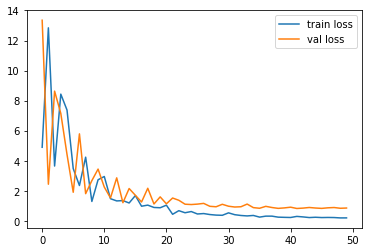

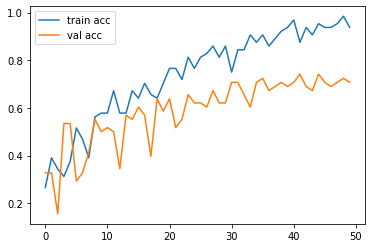

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[9.24043059e-01, 5.99297769e-02, 1.60271376e-02],
       [4.29234095e-03, 9.85144377e-01, 1.05632609e-02],
       [7.83452485e-03, 2.05018837e-02, 9.71663594e-01],
       [1.89137515e-02, 9.17073190e-01, 6.40130788e-02],
       [3.61564904e-01, 2.94850856e-01, 3.43584269e-01],
       [3.26917064e-03, 7.58706510e-01, 2.38024428e-01],
       [6.35317564e-02, 3.42963496e-04, 9.36125219e-01],
       [7.64223188e-02, 3.31003547e-01, 5.92574120e-01],
       [1.53010525e-02, 9.66882527e-01, 1.78164523e-02],
       [9.78077948e-01, 1.44646522e-02, 7.45739089e-03],
       [6.47663325e-02, 9.38038006e-02, 8.41429830e-01],
       [5.74740625e-06, 2.45967211e-04, 9.99748290e-01],
       [1.38992965e-01, 3.34596425e-01, 5.26410639e-01],
       [4.33407053e-02, 7.46536076e-01, 2.10123241e-01],
       [9.22693491e-01, 4.43539582e-02, 3.29525732e-02],
       [5.12148626e-02, 6.03993714e-01, 3.44791442e-01],
       [2.19036574e-05, 1.36257047e-04, 9.99841809e-01],
       [2.97340844e-02, 8.99379

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
model

In [25]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[1.6035023e-04, 4.5704196e-04, 9.9938262e-01]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a

array([2], dtype=int64)

In [33]:
a==1

array([False])